# Workshop 3: Linear Regression

## 1. Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [ ]:
!pip install matplotlib

### 1.1 Plotting a line: Two Point Method

In [1]:
import matplotlib.pyplot as plt

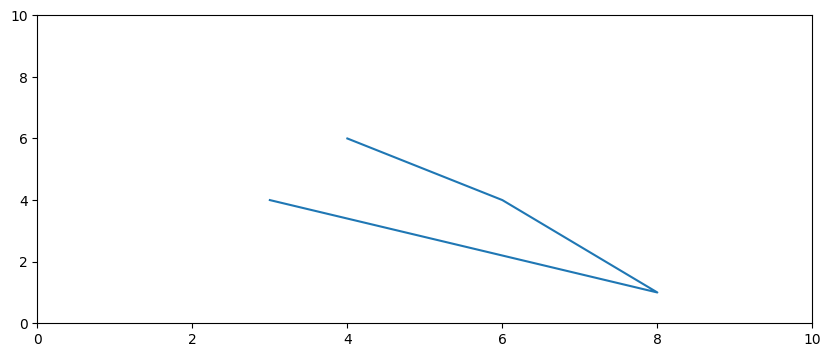

In [11]:
x = [3,8,6,4]
y = [4,1,4,6]

plt.figure(figsize=[10,4])

plt.xlim(0,10)
plt.ylim(0,10)

#plt.figure(figsize=[2,2])
plt.plot(x,y)

### 1.2 Plotting a line: Slope and Bias Method

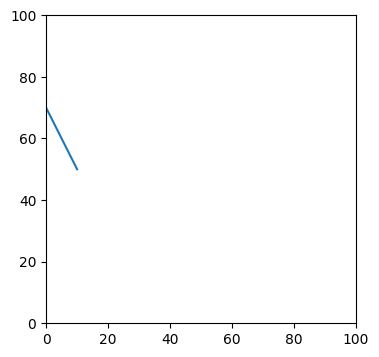

In [21]:
slope = -2
bias = 70

plt.figure(figsize=[4,4])
plt.xlim(0,100)
plt.ylim(0,100)

x_1 = [0,10]
x_2 = []
for i in x_1:
    x_2.append(i*slope+bias)

plt.plot(x_1,x_2)

### 1.3 Scatter Points

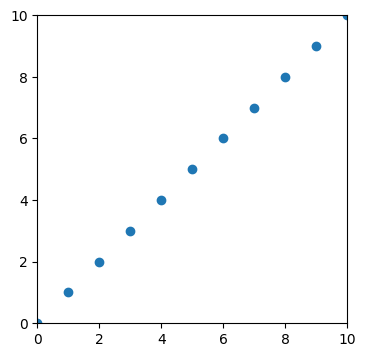

In [ ]:
slope = 1
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,10)
plt.ylim(0,10)

x_1 = [i for i in range(0,11)]
x_2 = []
for i in x_1:
    x_2.append(i*slope+bias)

plt.scatter(x_1,x_2)

## 2. Linear Regression

### 2.1 Show samples in figure

#### Exercise 1. Could you collate the following list into the format of X and y?

In [22]:
Raw_data = [6.1101,  17.5920,
            5.5277,  9.1302,
            8.5186,  13.6620,
            3.2365,  6.4421,
            7.0032,  11.8540,
            5.8598,  6.8233,
            10.9003,  19.7968,
            12.1108, 20.9464,
            2.3355, 4.6102,
            3.4547, 5,
            3.1109, 6.0091,
            3.5789, 7.0903,
            5.2067, 10.9897,
            1.1234, 3.0006,
            1.1518, 3.2035,
            2.2224, 5.0007,
            4.6728, 9.7832,
            3.3398, 7.2893,
            6.1718, 13.1452,
            13.1409, 28.2882,
            11.1112, 23.0405,
            5.1122, 12.3039,
            7.2135, 16.0088]

In [23]:
X = Raw_data[::2]
y = Raw_data[1::2]

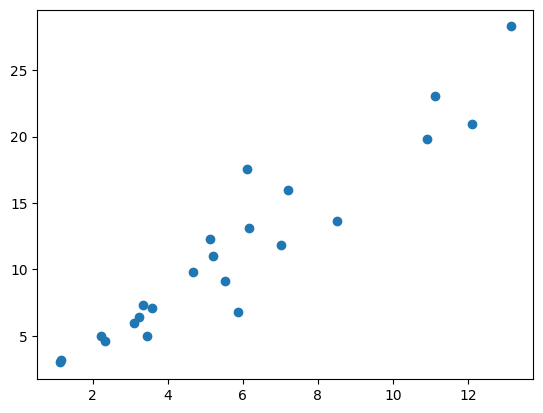

In [24]:
plt.scatter(x=X, y=y)

#### Exercise 2. Could you plot a line whose slope=1 and bias=0 based on the figure above?

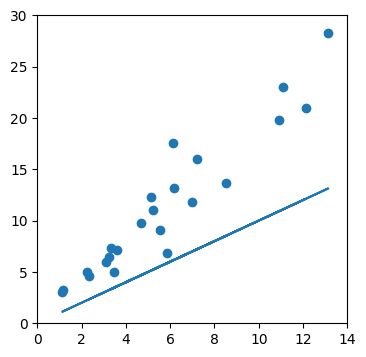

In [11]:
slope = 1
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,14)
plt.ylim(0,30)

y_pred = []
for i in X:
    y_pred.append(i*slope+bias)

plt.scatter(x=X, y=y)
plt.plot(X,y_pred)

### 2.2 Calculate the loss
Here we will compute the cost function and code that into Python. Cost function is given by
$$
J\left(\theta_0, \theta_1\right)=\frac{1}{2 m} \sum_{i=1}^m\left(h_\theta\left(x_i\right)-y_i\right)^2
$$
Where $h_\theta(x_i) = \theta_1 x_i + \theta_0$

In [12]:
y_sub = []
for i in range(len(y)):
    y_sub.append((y_pred[i] - y[i])**2)

sum(y_sub)

1031.5734920100003

#### 2.2.1 Plot the loss curve when bias is fixed.

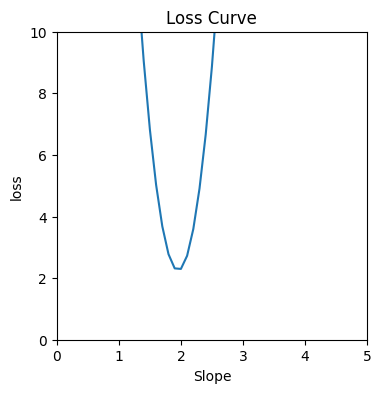

In [26]:
slope_list = [i*0.1 for i in range(0,100)]
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,5)
plt.ylim(0,10)

plt.title("Loss Curve")
plt.xlabel("Slope")
plt.ylabel("loss")

slope_loss_list=[]
for slope in slope_list:
    y_pred = []
    for i in X:
        y_pred.append(i*slope+bias)

    y_sub = []
    for i in range(len(y)):
        y_sub.append((y_pred[i] - y[i])**2)
    slope_loss_list.append(sum(y_sub)/2/len(y))

plt.plot([i*0.1 for i in range(100)],slope_loss_list)

#### Exercise 3. Could you plot the loss curve when slope is fixed?

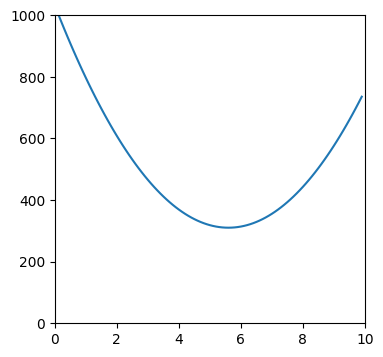

In [ ]:
slope = 1
bias_list = [i*0.1 for i in range(100)]

plt.figure(figsize=[4,4])
plt.xlim(0,10)
plt.ylim(0,1000)

bias_loss_list=[]
for bias in bias_list:
    y_pred = []
    for i in X:
        y_pred.append(i*slope+bias)

    y_sub = []
    for i in range(len(y)):
        y_sub.append((y_pred[i] - y[i])**2)
    bias_loss_list.append(sum(y_sub))

plt.plot([i*0.1 for i in range(100)],bias_loss_list)

### 2.3 Gradient Descent

$$
\begin{aligned}
\theta_0 &:=\theta_0-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_\theta\left(x_i\right)-y_i\right) x_i^{(0)}\right] \\
\theta_1 &:=\theta_1-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_{\theta}\left(x_i\right)-y_i\right) x_i^{(1)}\right]
\end{aligned}
$$

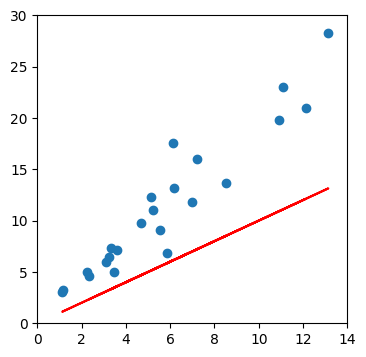

In [22]:
slope = 1
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,14)
plt.ylim(0,30)

y_pred = []
for i in X:
    y_pred.append(i*slope+bias)

plt.scatter(x=X, y=y)
plt.plot(X,y_pred,c="red")

In [23]:
alpha=0.0001
loss_list=[]
for iteration in range(100):

    y_pred = []
    for i in X:
        y_pred.append(i*slope+bias)
    y_sub = []
    for i in range(len(y)):
        y_sub.append((y_pred[i] - y[i])**2)
    loss_list.append(sum(y_sub))

    slope_samples_gradient_list = []
    for i in range(len(X)):
        slope_one_sample_gradient = (slope*X[i]+bias-y[i])*X[i]
        slope_samples_gradient_list.append(slope_one_sample_gradient)
    slope-=alpha*sum(slope_samples_gradient_list)

    bias_samples_gradient_list = []
    for i in range(len(X)):
        bias_one_sample_gradient = slope*X[i]+bias-y[i]
        bias_samples_gradient_list.append(bias_one_sample_gradient)
    bias-=alpha*sum(bias_samples_gradient_list)

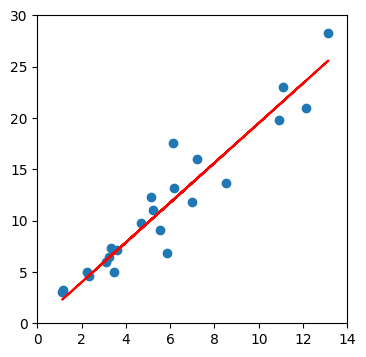

In [24]:
plt.figure(figsize=[4,4])
plt.xlim(0,14)
plt.ylim(0,30)

y_pred = []
for i in X:
    y_pred.append(i*slope+bias)

plt.scatter(x=X, y=y)
plt.plot(X,y_pred,color="red")

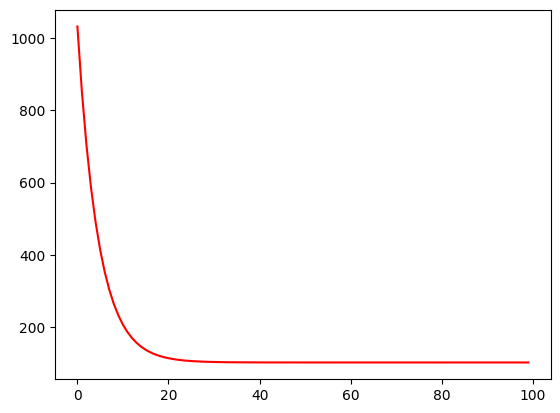

In [25]:
plt.plot(loss_list,color="red")